# PROJECT ON CLASSIFICATION BASED ON PERSONAL INCOME 

# INTRODUCTION TO CLASSIFICATION CASE STUDY

# 1.Pre-profilling

## 2.  Problem Statement :

•	“Subsidy Inc.” delivers subsidies to individuals based on their income.
•	Accurate income data is one of the hardest pieces of data to obtain across the world.
•	Subsidy Inc. has obtained a large data set of authenticated data on individual income, demographic parameters, and few         financial parameters.
•	Subsidy Inc. wishes us to:
•	Develop an income classifier system for individuals.


## The Objective is to :

Simplify the data system by reducing the number of variables to be studied, without sacrificing too much of accuracy. Such a system would help subsidy Inc. in planning system subsidy outlay , monitoring and preventing misuse. 

In [4]:
"""
CLASSIFYING PERSONAL INCOME

"""


'\nCLASSIFYING PERSONAL INCOME\n\n'

Variable Description :

size: 31,978 x 13  
dataFile : r'C:\Users\User\Downloads\income(1) 

Variables       : Description                                              

Age             : The age of the individual in years                      

Job Type        : Working status of a person ,which sector does he work in 

Ed Type         : The level of Education                                  

maritalstatus   : The marital status of the individual

Occupation      : The type of work the individual does.

Relationship    : Relationship of individual to his/her household

race            : The individual’s race

gender          : The individual’s gender

capitalgain     : The capital gains of the individual


capitalloss     : The capital losses of the individual

hoursperweek    : The no. of hours the individual works per week

SalStat         : The outcome variable indicating whether a person’s salary status


## 3. Import libraries

In [10]:
################# REQUIRED PACKAGES ###################

# TO WORK WITH DATAFRAMES

import pandas as pd

# TO WORK WITH NUMERICAL OPERATIONS 

import numpy as np

# TO VISUALIZE DATA

import matplotlib as plt

import seaborn as sns
sns.set(style = 'whitegrid', font_scale = 1.3,color_codes = True)


# 4. LOADING DATA

In [14]:
# ######################################################################
#  IMPORTING DATA
# ######################################################################

income_data = pd.read_csv(r'C:\Users\Shreyas\Desktop\KANCHAN-INSAID\income(1).csv')

In [15]:
# CREATING A COPY OF ORIGINAL DATASET
data = income_data.copy()

## 4.1 Description of dataset

In [16]:
data

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


Getting to know about the data


In [17]:
# ******** To check variables data type ******

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [18]:
# ****To see top five rows data *********

data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [19]:
# ******* to check '-',cancelltion,outliers******

data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


# 5. DATA PRE-PROCESSING

#  5.1 Duplicate Rows :

In [20]:
# ********** Check for Duplicate rows *********

duplicate = data[data.duplicated()]

duplicate.head()

len(duplicate)


3462

In [21]:
# ************ Droping Duplicates **************

data = data.drop_duplicates()

len(data)

28516

# 5.2 Missing Values :

In [22]:
# *************** checking missing values **********

data.isnull()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31972,False,False,False,False,False,False,False,False,False,False,False,False,False
31973,False,False,False,False,False,False,False,False,False,False,False,False,False
31974,False,False,False,False,False,False,False,False,False,False,False,False,False
31975,False,False,False,False,False,False,False,False,False,False,False,False,False


Basiccaly .isnull() written boolean values. Here we can see the cells are written True and False. True indicate missing data and and False indicates no-missing values in the perticular cell. 

In [23]:
data.isnull().sum()
print('data columns with null values',data.isnull().sum())

data columns with null values age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


From above isnull().sum() function we can get the total no.of missing values.

# 5.3 Descriptive Statistics

In [24]:
# ********* Summary of Numerical Variables **********

summary_num = data.describe()

print(summary_num)


                age   capitalgain   capitalloss  hoursperweek
count  28516.000000  28516.000000  28516.000000  28516.000000
mean      39.261046   1185.231204     96.733764     40.619512
std       13.711978   7693.642033    422.964800     12.740703
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     39.000000
50%       38.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


There are 4 numerical variables. Storing data into the summary_num variable.

In [25]:
# ********* Summary of Categorical Variables **********

summary_cate=data.describe(include="O")

print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      28516     28516                28516            28516        28516   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       19214      8754                12966             3783        11261   

          race gender   nativecountry                        SalStat  
count    28516  28516           28516                          28516  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     24054  18829           25721                          21451  


There are 9 categorical variables. Storing data into the summary_cate variable.
simillarly, we can look at the other statistical categorical variable in our data frame.

# 6. EXPLORATORY DATA ANALYSIS

In [26]:
# ********** Frequency of each categories *****************

data['JobType'].value_counts()

 Private             19214
 Self-emp-not-inc     2431
 Local-gov            2014
 ?                    1605
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [27]:
data['occupation'].value_counts()

 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other-service        2914
 Machine-op-inspct    1666
 ?                    1612
 Transport-moving     1420
 Handlers-cleaners    1159
 Farming-fishing       957
 Tech-support          858
 Protective-serv       626
 Priv-house-serv       141
 Armed-Forces            9
Name: occupation, dtype: int64

In [28]:
#************* CHECKING FOR UNIQUE CLASSES **********

data['JobType'].nunique()

print(np.unique(data['JobType']))


[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


In [29]:
print(np.unique(data['occupation']))

data['occupation'].nunique()

# ********* there exists ' ?' instead of nan

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


15

In [31]:
"""
Go back and the data by including "na_values[' ?']" to consider ' ?' as nan
"""

data = pd.read_csv(r'C:\Users\Shreyas\Desktop\KANCHAN-INSAID\income(1).csv',na_values = [" ?"])

data

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


# DATA PRE-PROCESSING

In [32]:
# ************* Data Pre-processing ***********

data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [33]:
# ****** check the missing values *******

missing = data[data.isnull().any(axis=1)]
missing

# axis =1 : To consider at least one column value is missing

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [36]:
# ****** Dropping the missing values *********

data2 = data.dropna(axis=0)
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


""" POINTS TO NOTE : 

1. Missing values in Jobtype     = 1809
2. Missing values in occupation  = 1816
3. There are 1809 rows where two specific columns i.e. occupation and jobtype have missing values 
4. (1816-1809) = 7 =>You still have occupation unfilled for these rows. Beacuse, Job type is never worked.

"""

## Relation between indepedent variables

In [37]:
# ******* Relation between independent variables *****

correlation = data2.corr()

correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


# CROSS TABLES AND DATA VISUALISATION

## Extracting the column names 

In [38]:
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [39]:
# ************ Gender proportion table ********

gender = pd.crosstab(index     = data2["gender"],
                    columns    = 'count',
                    normalize  = True)

print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [40]:
# *******************************************
#  Gender vs Salary status
# *******************************************

gender_salstat = pd.crosstab(index = data2["gender"],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


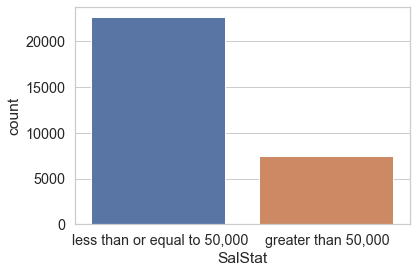

In [41]:
# *******************************************
#  Frequency distribution of 'Salary Status'
# *******************************************

SalStat = sns.countplot(data2['SalStat'])


"""
   75 % of people's salary status is <= 50,000  and
   25 % of people's salary status is >  50,000
    
""" 

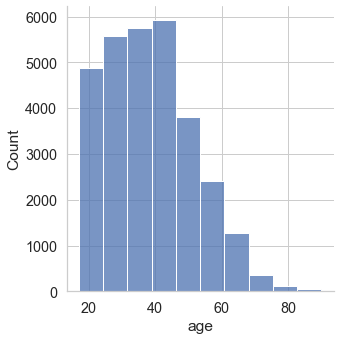

In [43]:
# *******************************************
#  Histogram of Age
# *******************************************

sns.displot(data2['age'], bins=10, kde=False)


""" People with age 20-45 age are high in frequency
"""

## Bi-variate analysis 

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

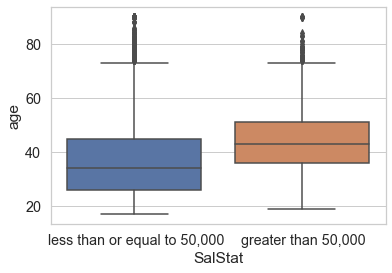

In [45]:
# *******************************************
# Box Plot - Age vs salary status
# *******************************************

sns.boxplot('SalStat', 'age', data = data2)
data2.groupby('SalStat')['age'].median()

To check how salary status is affected by the age.
people with 35-50 age above are likely to earn more than 50,000 USD and
people with 25-30 likely to earn less than 50,000 USD.

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


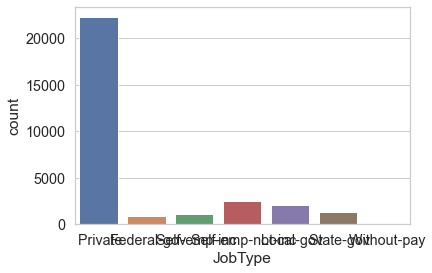

In [46]:
# *******************************************
#  Frequency distribution of 'JobType'
# *******************************************

JobType = sns.countplot(data2['JobType'])


people with 35-50 age are more likely to earn >  50,000 USD per year 
people with 25-35 age are more likely to earn <= 50,000

In [47]:
# *******************************************
#  Job Type vs Salary Status
# *******************************************

JobType_salstat = pd.crosstab(index = data2['JobType'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

print(JobType_salstat)

SalStat             greater than 50,000   less than or equal to 50,000
JobType                                                               
 Federal-gov                   0.387063                       0.612937
 Local-gov                     0.294630                       0.705370
 Private                       0.218792                       0.781208
 Self-emp-inc                  0.558659                       0.441341
 Self-emp-not-inc              0.285714                       0.714286
 State-gov                     0.268960                       0.731040
 Without-pay                   0.000000                       1.000000
All                            0.248922                       0.751078


Self-emp-inc                  0.558659                       0.441341
-from above observations and table it is visible that 56% of self employed people earn more than 50,000 USD per year
-Hence an important variable in avoding the misuse of subsidies.

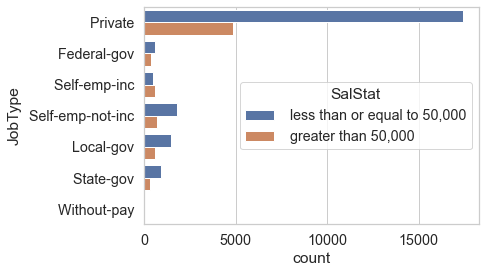

In [48]:
# *******************************************
#  Job Type vs. Salary Status
# *******************************************

JobType_salstat = sns.countplot(y ="JobType" , data = data2,hue='SalStat')

Simillarly,Job Type vs.Salary Status Frequency distribution of Job Type.
1. From the above table it is visible that 56% of self employed people earn more than 50,000 USD per year
2. Hence an important variable in avoiding the misuse of subsidies.

In [49]:
# *******************************************
#  Education vs. Salary Status
# *******************************************

Education_salstat = pd.crosstab(index = data2['EdType'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

print(Education_salstat)

SalStat         greater than 50,000   less than or equal to 50,000
EdType                                                            
 10th                      0.071951                       0.928049
 11th                      0.056298                       0.943702
 12th                      0.076923                       0.923077
 1st-4th                   0.039735                       0.960265
 5th-6th                   0.041667                       0.958333
 7th-8th                   0.062837                       0.937163
 9th                       0.054945                       0.945055
 Assoc-acdm                0.253968                       0.746032
 Assoc-voc                 0.263198                       0.736802
 Bachelors                 0.421491                       0.578509
 Doctorate                 0.746667                       0.253333
 HS-grad                   0.164329                       0.835671
 Masters                   0.564229                       0.43

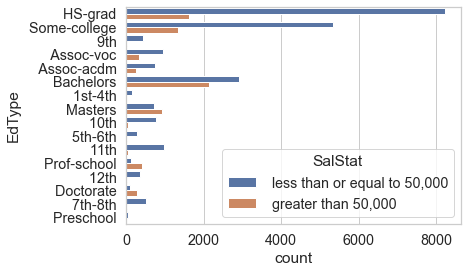

In [50]:
# *******************************************
#  Education vs. Salary Status
# *******************************************

Education_salstat = sns.countplot(y="EdType" , data = data2,hue='SalStat')

From the above table and graph we can see that people who have done Doctorate, Masters, prof-school are more likely to earn above 50,000 USD per year when compared with others. Hence an influencing variable in avoiding the misuse of subsidies.

In [51]:
# *******************************************
#  occupation vs. Salary Status
# *******************************************

occupation_salstat = pd.crosstab(index = data2['occupation'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

print(occupation_salstat)

SalStat              greater than 50,000   less than or equal to 50,000
occupation                                                             
 Adm-clerical                   0.133835                       0.866165
 Armed-Forces                   0.111111                       0.888889
 Craft-repair                   0.225310                       0.774690
 Exec-managerial                0.485220                       0.514780
 Farming-fishing                0.116279                       0.883721
 Handlers-cleaners              0.061481                       0.938519
 Machine-op-inspct              0.124619                       0.875381
 Other-service                  0.041096                       0.958904
 Priv-house-serv                0.006993                       0.993007
 Prof-specialty                 0.448489                       0.551511
 Protective-serv                0.326087                       0.673913
 Sales                          0.270647                       0

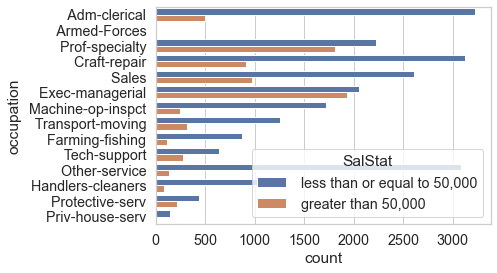

In [52]:
# *******************************************
#  occupation vs. Salary Status
# *******************************************

occupation_salstat = sns.countplot(y = "occupation" , data = data2,hue='SalStat')

From above observations those who make more than 50,000 USD per year are more likely to work as managers and professionals, hence an important variable in avoding the misuse of subsidies.

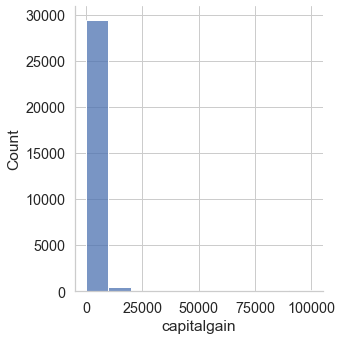

In [54]:
# *******************************************
#  Histogram of capitalgain
# *******************************************

sns.displot(data2['capitalgain'], bins=10, kde=False)

92% (27611) of the capital gain is 0.

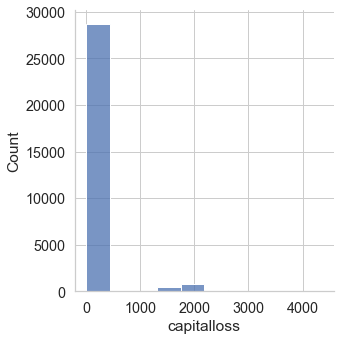

In [56]:
# *******************************************
#  Histogram of capitalloss
# *******************************************

sns.displot(data2['capitalloss'], bins=10, kde=False)



95% (28721) of the capital loss is 0.

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SalStat
 greater than 50,000             40
 less than or equal to 50,000    40
Name: hoursperweek, dtype: int64

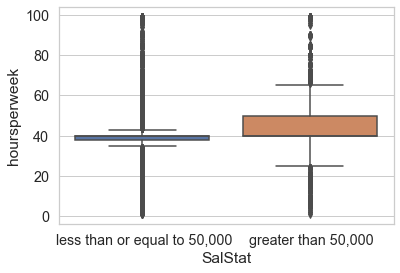

In [57]:
# *******************************************
# Box Plot - Hours per week vs salary status
# *******************************************

sns.boxplot('SalStat', 'hoursperweek', data = data2)
data2.groupby('SalStat')['hoursperweek'].median()

SalStat
 greater than 50,000             40
 less than or equal to 50,000    40
Name: hoursperweek, dtype: int64

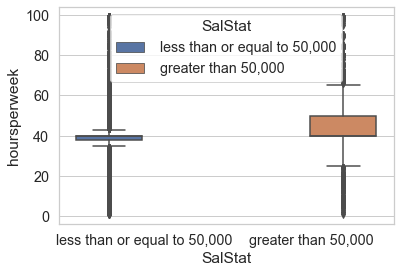

In [58]:
sns.boxplot(x = 'SalStat', y = 'hoursperweek', hue = 'SalStat', data = data2)
data2.groupby('SalStat')['hoursperweek'].median()

1. From the above plot it is clearly visible that those who make more than 50,000 USD per year are more likely to spend 40-50 hours per week.
2. This variable can contribute in classifying the individual's salary salary status since there is association between salary status and hours per week.

# 9. Summarization

## 9.1 Conclusion 

Simplify the data system by reducing the number of variables to be studied, without sacrificing too much of accuracy. Such a system would help subsidy Inc. in planning system subsidy outlay , monitoring and preventing misuse.